In [87]:
# Class별 OOD개수에 맞춰서 N을 뽑습니다.

# C = 6; N = 500;
# C = 7; N = 300;
# C = 8; N = 400;

C = 0; N = 1400;

In [88]:
GAMEEMO_CHLS = ['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7', 'P8', 'T7', 'T8']  # 14 channels
GAMEEMO_SUBNUM = 28
GAMEEMO_LOCATION = [['-', '-', '-', '-', '-', '-', '-', '-', '-'],
    ['-', '-', '-', 'AF3', '-', 'AF4', '-', '-', '-'],
    ['F7', '-', 'F3', '-', '-', '-', 'F4', '-', 'F8'],
    ['-', 'FC5', '-', '-', '-', '-', '-', 'FC6', '-'],
    ['T7', '-', '-', '-', '-', '-', '-', '-', 'T8'],
    ['-', '-', '-', '-', '-', '-', '-', '-', '-'],
    ['P7', '-', '-', '-', '-', '-', '-', '-', 'P8'],
    ['-', '-', '-', '-', '-', '-', '-', '-', '-'],
    ['-', '-', '-', 'O1', '-', 'O2', '-', '-', '-']]

DEAP_CHLS = [
    'FP1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3',
    'P7', 'PO3', 'O1', 'OZ', 'PZ', 'FP2', 'AF4', 'FZ', 'F4', 'F8', 'FC6', 'FC2',
    'CZ', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']
DEAP_SUBNUM = 32
DEAP_LOCATION = [['-', '-', '-', 'FP1', '-', 'FP2', '-', '-', '-'],
                ['-', '-', '-', 'AF3', '-', 'AF4', '-', '-', '-'],
                ['F7', '-', 'F3', '-', 'FZ', '-', 'F4', '-', 'F8'],
                ['-', 'FC5', '-', 'FC1', '-', 'FC2', '-', 'FC6', '-'],
                ['T7', '-', 'C3', '-', 'CZ', '-', 'C4', '-', 'T8'],
                ['-', 'CP5', '-', 'CP1', '-', 'CP2', '-', 'CP6', '-'],
                ['P7', '-', 'P3', '-', 'PZ', '-', 'P4', '-', 'P8'],
                ['-', '-', '-', 'PO3', '-', 'PO4', '-', '-', '-'],
                ['-', '-', '-', 'O1', 'OZ', 'O2', '-', '-', '-']]

def load_dataset_info(dataset):
    if dataset == 'GAMEEMO': return GAMEEMO_SUBNUM, GAMEEMO_CHLS, GAMEEMO_LOCATION
    elif dataset == 'SEED': return SEED_SUBNUM, SEED_CHLS, SEED_LOCATION
    elif dataset == 'SEED_IV': return SEED_IV_SUBNUM, SEED_IV_CHLS, SEED_IV_LOCATION
    elif dataset == 'DEAP': return DEAP_SUBNUM, DEAP_CHLS, DEAP_LOCATION

def get_sfreq(dataset):
    if dataset == 'GAMEEMO':
        sfeq = 128; l_freq, h_freq = 0.16, 43
    elif dataset == 'SEED':
        sfeq = 200; #l_freq, h_freq = 0, 75; 
        l_freq, h_freq = 2, 50
    elif dataset == 'SEED_IV':
        sfeq = 200; #l_freq, h_freq = 1, 75;
        l_freq, h_freq = 2, 50
    elif dataset == 'DEAP':
        sfeq = 128; l_freq, h_freq = 4, 45
    return sfeq, l_freq, h_freq

In [89]:
%matplotlib inline

import os
from os.path import join, exists
from pathlib import Path
import numpy as np
import mne
import matplotlib.pyplot as plt
from PIL import Image

DATASET_NAME = 'GAMEEMO' #'GAMEEMO, SEED, SEED_IV, DEAP'
LABEL = 'v' # 'v', 'a' GAMEEMO/DEAP, '4' SEED, SEED_IV
MODEL_NAME = 'CCNN' # CCNN, TSC, EEGNet, DGCNN
FEATURE = 'DE' # 'DE, PSD, raw'

PROJECT = 'Low_5'
THRESHOLDS = ['95']

if MODEL_NAME == 'CCNN': SHAPE = 'grid'
elif MODEL_NAME == 'TSC' or MODEL_NAME == 'EEGNet': SHAPE = 'expand'; FEATURE = 'raw'
elif MODEL_NAME == 'DGCNN': SHAPE = None
# if FEATURE == 'DE': SCALE = None
# elif FEATURE == 'PSD': SCALE = 'log'
# elif FEATURE == 'raw': SCALE = 'standard'
if LABEL == 'a':    train_name = 'arousal'
elif LABEL == 'v':  train_name = 'valence'
else:               train_name = 'emotion'
if MODEL_NAME == 'EEGNet' or MODEL_NAME == 'TSC': MODEL_FEATURE = MODEL_NAME
else: MODEL_FEATURE = '_'.join([MODEL_NAME, FEATURE])

SUB_NUM, CHLS, LOCATION = load_dataset_info(DATASET_NAME)

analysis_file = 'analysis'
analysis_path = Path(join(os.getcwd(), 'results', DATASET_NAME, MODEL_FEATURE, PROJECT, train_name, analysis_file))

if not exists(analysis_path): raise FileNotFoundError(f"File not found: {analysis_path}")
else: print(analysis_path)

/home/hyodol/HYODOL/OOD/results/GAMEEMO/CCNN_DE/Low_5/valence/analysis


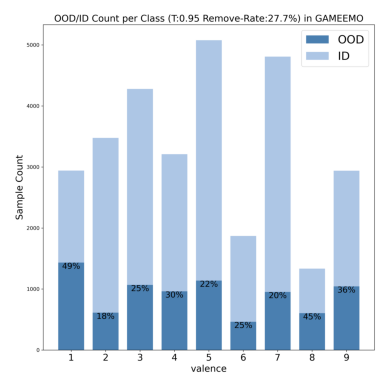

In [90]:
img = Image.open(join(analysis_path,f'ID_OOD_class{THRESHOLDS[0]}.png'))
plt.imshow(img); plt.axis('off'); plt.show()

In [91]:
# Load ID/OOD from .npz file
IND_npz = f'IND_{THRESHOLDS[0]}.npz'
OOD_npz = f'OOD_{THRESHOLDS[0]}.npz'

def load_data(dir, npz):
    data = np.load(join(dir, npz), allow_pickle=True)
    X, Y = data['X'], data['Y']
    labels, subids = Y[:, 0], Y[:, 1]
    print(X.shape, labels.shape, subids.shape)
    return X, labels, subids

# Load ID,OOD
X_ind, labels_ind, subids_ind = load_data(analysis_path, IND_npz)
X_ood, labels_ood, subids_ood = load_data(analysis_path, OOD_npz)

(21655, 4, 9, 9) (21655,) (21655,)
(8277, 4, 9, 9) (8277,) (8277,)


In [92]:
def reverse_grid(datas, channel, location):
    CHANNEL_LOCATION_DICT = format_channel_location_dict(channel, location)
    togrid = ToGrid(CHANNEL_LOCATION_DICT)
    return np.array([togrid.reverse(sample) for sample in datas])

def format_channel_location_dict(channel_list, location_list):
    location_list = np.array(location_list)
    output = {}
    for channel in channel_list:
        if len(np.argwhere(location_list == channel)):
            location = (np.argwhere(location_list == channel)[0]).tolist()
            output[channel] = location
    return output
    
class ToGrid:
    def __init__(self, channel_location_dict):
        self.channel_location_dict = channel_location_dict

        loc_x_list = []
        loc_y_list = []
        for _, (loc_y, loc_x) in channel_location_dict.items():
            loc_x_list.append(loc_x)
            loc_y_list.append(loc_y)
        self.width = max(loc_x_list) + 1
        self.height = max(loc_y_list) + 1

    def apply(self, eeg):
        # num_electrodes x timestep
        outputs = np.zeros([self.height, self.width, eeg.shape[-1]])
        # 9 x 9 x timestep
        for i, (loc_y, loc_x) in enumerate(self.channel_location_dict.values()):
            outputs[loc_y][loc_x] = eeg[i]

        outputs = outputs.transpose(2, 0, 1)
        # timestep x 9 x 9
        return outputs
        
    def reverse(self, eeg):
        # timestep x 9 x 9
        eeg = eeg.transpose(1, 2, 0)
        # 9 x 9 x timestep
        num_electrodes = len(self.channel_location_dict)
        outputs = np.zeros([num_electrodes, eeg.shape[2]])
        for i, (x, y) in enumerate(self.channel_location_dict.values()):
            outputs[i] = eeg[x][y]
        # num_electrodes x timestep
        return outputs
        
X_ind = reverse_grid(X_ind, CHLS, LOCATION)
X_ood = reverse_grid(X_ood, CHLS, LOCATION)

print(X_ind.shape, X_ood.shape)

(21655, 14, 4) (8277, 14, 4)


In [93]:
print(train_name)
label_class = np.unique(labels_ind)
label_class

valence


array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [94]:
np.unique(labels_ood)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [95]:
len(np.unique(subids_ind)) == len(np.unique(subids_ood))

True

# Filter label C

In [96]:


label_names = np.unique(labels_ood) +1 
label_name = f'{train_name}({label_names[C]})'
label_name

'valence(1)'

In [97]:
X_ind_C = X_ind[labels_ind == C]
subids_ind_C = subids_ind[labels_ind == C]

X_ood_C = X_ood[labels_ood == C]
subids_ood_C = subids_ood[labels_ood == C]

In [98]:
# Create Info
sfreq, l_freq, h_freq = get_sfreq(DATASET_NAME)
info = mne.create_info(ch_names=CHLS, sfreq=sfreq, ch_types="eeg")

# Assign the montage
montage = mne.channels.make_standard_montage('standard_1020')
# print(montage.ch_names)
info.set_montage(montage)

<Info | 8 non-empty values
 bads: []
 ch_names: AF3, AF4, F3, F4, F7, F8, FC5, FC6, O1, O2, P7, P8, T7, T8
 chs: 14 EEG
 custom_ref_applied: False
 dig: 17 items (3 Cardinal, 14 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 128.0 Hz
>

In [99]:
# Create events based on subids 
events_ind = np.column_stack([np.arange(len(subids_ind_C)), np.zeros(len(subids_ind_C), dtype=int), subids_ind_C])
events_ind

array([[   0,    0,    2],
       [   1,    0,    2],
       [   2,    0,    2],
       ...,
       [1503,    0,   28],
       [1504,    0,   28],
       [1505,    0,   28]])

In [100]:
event_id_ind = {f'sub_{int(i)}': int(i) for i in np.unique(subids_ind_C)}
event_id_ind

{'sub_2': 2,
 'sub_3': 3,
 'sub_5': 5,
 'sub_8': 8,
 'sub_16': 16,
 'sub_21': 21,
 'sub_27': 27,
 'sub_28': 28}

In [101]:
events_ood = np.column_stack([np.arange(len(subids_ood_C)), np.zeros(len(subids_ood_C), dtype=int), subids_ood_C])
event_id_ood = {f'sub_{int(i)}': int(i) for i in np.unique(subids_ood_C)}

In [102]:
# Create EpochsArray
epochs_ind = mne.EpochsArray(X_ind_C, info, events=events_ind, event_id=event_id_ind)
epochs_ood = mne.EpochsArray(X_ood_C, info, events=events_ood, event_id=event_id_ood)
print(epochs_ind)
print(epochs_ood)

Not setting metadata
1506 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1434 matching events found
No baseline correction applied
0 projection items activated
<EpochsArray |  1506 events (all good), 0 – 0.0234375 s, baseline off, ~684 kB, data loaded,
 'sub_2': 297
 'sub_3': 193
 'sub_5': 174
 'sub_8': 89
 'sub_16': 142
 'sub_21': 373
 'sub_27': 123
 'sub_28': 115>
<EpochsArray |  1434 events (all good), 0 – 0.0234375 s, baseline off, ~653 kB, data loaded,
 'sub_2': 238
 'sub_3': 74
 'sub_5': 93
 'sub_8': 178
 'sub_16': 125
 'sub_21': 162
 'sub_27': 144
 'sub_28': 420>


# Sampling

In [103]:
# Subject-Dependent analysis
 
# sub_ID = 'sub_4'
# epochs_sub_ind = epochs_ind[sub_ID]
# epochs_sub_ood = epochs_ood[sub_ID]

# len(epochs_sub_ind), len(epochs_sub_ood)

In [104]:
# epochs_ind.event_id.keys()

In [105]:
# def balanced_random_sampling(epochs, n_samples_per_event, event_keys):
#     selected_indices = []
    
#     for key in event_keys:
#         event_indices = np.where(epochs.events[:, 2] == key)[0]
#         if len(event_indices) >= n_samples_per_event:
#             random_indices = np.random.choice(event_indices, n_samples_per_event, replace=False)
        
#         selected_indices.extend(random_indices)
    
#     return epochs[np.array(selected_indices)]

# event_keys_ind = np.unique(epochs_ind.events[:, 2])
# event_keys_ood = np.unique(epochs_ood.events[:, 2])

# balanced_epochs_ind = balanced_random_sampling(epochs_ind, 2, event_keys_ind)
# balanced_epochs_ood = balanced_random_sampling(epochs_ood, 2, event_keys_ood)
# balanced_epochs_ind , balanced_epochs_ood

In [106]:


def random_sample_epochs(epochs, num_samples):
    random_indices = np.random.choice(len(epochs), num_samples, replace=False)
    return epochs[random_indices]

random_epochs_ind = random_sample_epochs(epochs_ind, N)
random_epochs_ood = random_sample_epochs(epochs_ood, N)

print(random_epochs_ind)
print(random_epochs_ood)

print(random_epochs_ind.get_data().shape, random_epochs_ood.get_data().shape)

<EpochsArray |  1400 events (all good), 0 – 0.0234375 s, baseline off, ~638 kB, data loaded,
 'sub_2': 274
 'sub_3': 178
 'sub_5': 161
 'sub_8': 87
 'sub_16': 133
 'sub_21': 347
 'sub_27': 111
 'sub_28': 109>
<EpochsArray |  1400 events (all good), 0 – 0.0234375 s, baseline off, ~638 kB, data loaded,
 'sub_2': 232
 'sub_3': 71
 'sub_5': 89
 'sub_8': 175
 'sub_16': 120
 'sub_21': 161
 'sub_27': 142
 'sub_28': 410>
(1400, 14, 4) (1400, 14, 4)


In [107]:
random_epochs_ind.get_data()[:,:,0].shape

(1400, 14)

## DE 

In [113]:
def get_minmax(inds, oods):
    combined = np.concatenate([inds, oods], axis=0)
    return np.min(combined), np.max(combined)

def get_indood(epochs_ind, epochs_ood):
    
    freq_bands = ['Theta', 'Alpha', 'Beta', 'Gamma']
    
    ind_band = {band: [] for band in freq_bands}
    ood_band = {band: [] for band in freq_bands}
    
    for i, band in enumerate(freq_bands):
        print(band)

        de_ind = epochs_ind.get_data()[:,:, i] #samples, channels, freq
        de_ood = epochs_ood.get_data()[:,:, i]
        
        # Average per epoch
        inds = np.mean(de_ind, axis=0)
        oods = np.mean(de_ood, axis=0)
                                                             
        # Normalize
        min_val, max_val = get_minmax(inds, oods)
        print(min_val, max_val)
        
        inds = (inds - min_val) / (max_val - min_val)
        oods = (oods - min_val) / (max_val - min_val)
               
        ind_band[band] = inds
        ood_band[band] = oods
        
    return ind_band, ood_band

band_ind, band_ood = get_indood(random_epochs_ind, random_epochs_ood)

Theta
2.891712058809937 3.2893191903282024
Alpha
2.7666222048176805 3.1185135026521476
Beta
3.0629344822955265 3.3721577423034224
Gamma
2.6727417862158513 2.87929422297468


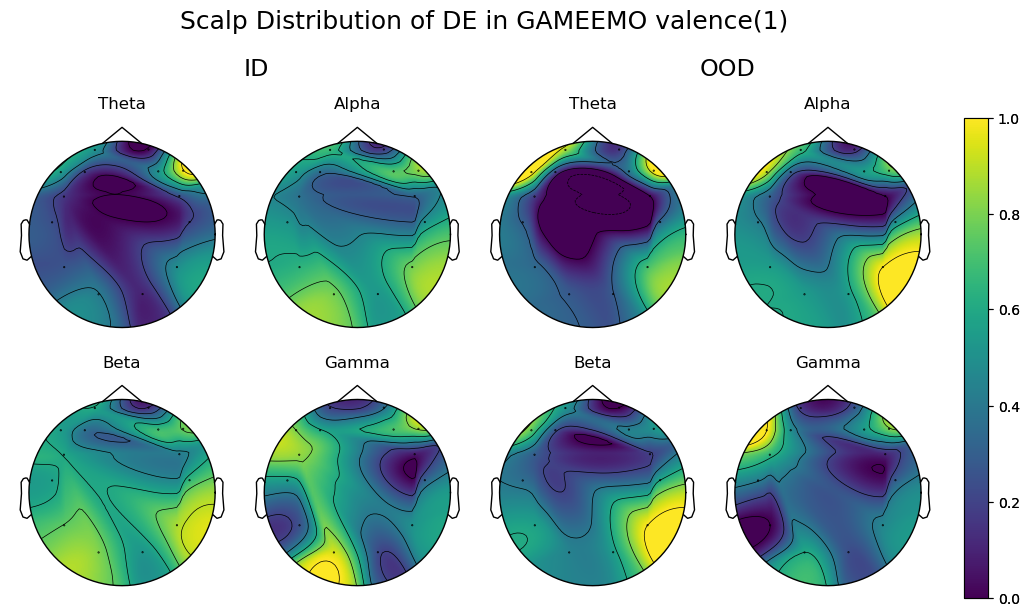

In [114]:
def plot_de_topomap(band_de, label, fig, axs):
    pos = [(0, 0), (0, 1), (1, 0), (1, 1)]
    
    for p, (band, de) in zip(pos, band_de.items()):
        im, _ = mne.viz.plot_topomap(de, epochs_ind.info, axes=axs[p[0], p[1]], cmap='viridis', show=False, vlim=(0,1)) 
        axs[p[0], p[1]].set_title(f"{band}")

    cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.8])
    plt.colorbar(im, cax=cbar_ax, format="%.1f")
    plt.subplots_adjust(wspace=0.05, hspace=0.05)

fig, axs = plt.subplots(2, 4, figsize=(12, 6))

plot_de_topomap(band_ind, 'ID', fig, axs[:, :2])
axs[0, 0].text(1.1, 1.2, 'ID', fontsize=17, ha='center', transform=axs[0, 0].transAxes)

plot_de_topomap(band_ood, 'OOD', fig, axs[:, 2:])
axs[0, 2].text(1.1, 1.2, 'OOD', fontsize=17, ha='center', transform=axs[0, 2].transAxes)

plt.suptitle(f'Scalp Distribution of DE in {DATASET_NAME} {label_name}', ha='center', fontsize=18, x=0.52, y=1.1)
plt.savefig(join(analysis_path, f'{label_name}_analysis.png'), bbox_inches='tight', dpi=300)
plt.show()

In [116]:
freq_bands = ['Theta', 'Alpha', 'Beta', 'Gamma']

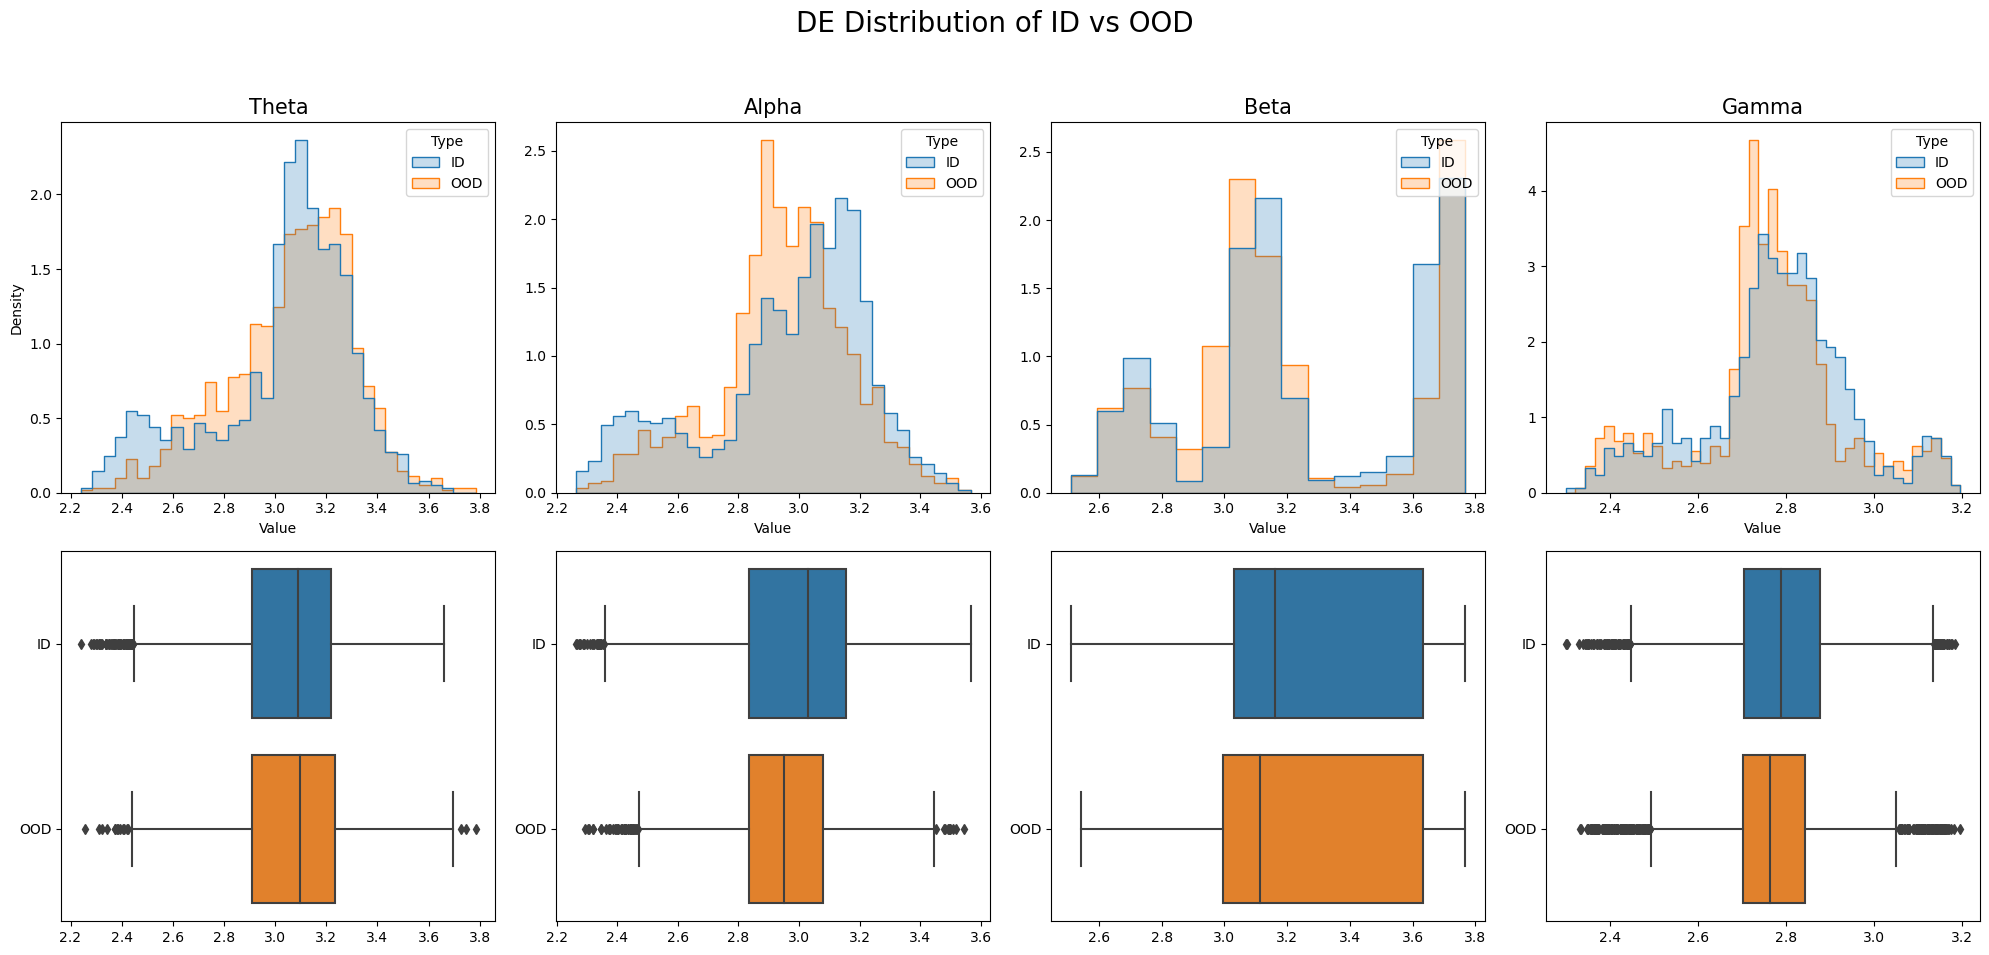

In [117]:
import pandas as pd
import seaborn as sns

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('DE Distribution of ID vs OOD', fontsize=20)

for freq in range(4):
    ind_mean = np.mean(random_epochs_ind.get_data()[:, :, freq], axis=1)
    ood_mean = np.mean(random_epochs_ood.get_data()[:, :, freq], axis=1)
    
    df = pd.DataFrame({
        'Value': np.concatenate([ind_mean, ood_mean]),
        'Type': ['ID'] * len(ind_mean) + ['OOD'] * len(ood_mean)})
    
    sns.histplot(data=df, x='Value', hue='Type', element='step', stat='density', common_norm=False, ax=axs[0, freq])
    # axs[0, freq].set_xlabel('')  # x축 레이블 삭제
    if freq != 0: axs[0, freq].set_ylabel('')  # y축 레이블 삭제
    
    sns.boxplot(data=df, y='Type', x='Value', orient='h', ax=axs[1, freq])
    axs[1, freq].set_xlabel('')  # x축 레이블 삭제
    axs[1, freq].set_ylabel('')  # y축 레이블 삭제
    
    axs[0, freq].set_title(f"{freq_bands[freq]}", fontsize=15)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.tight_layout()
plt.show()

(14, 4)


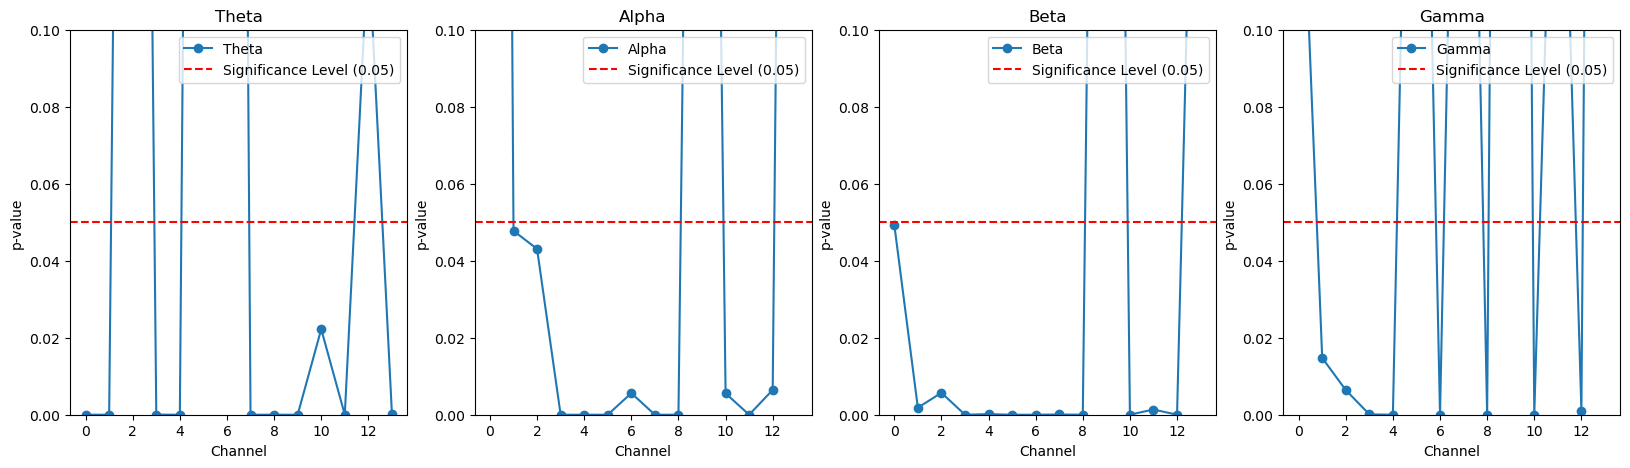

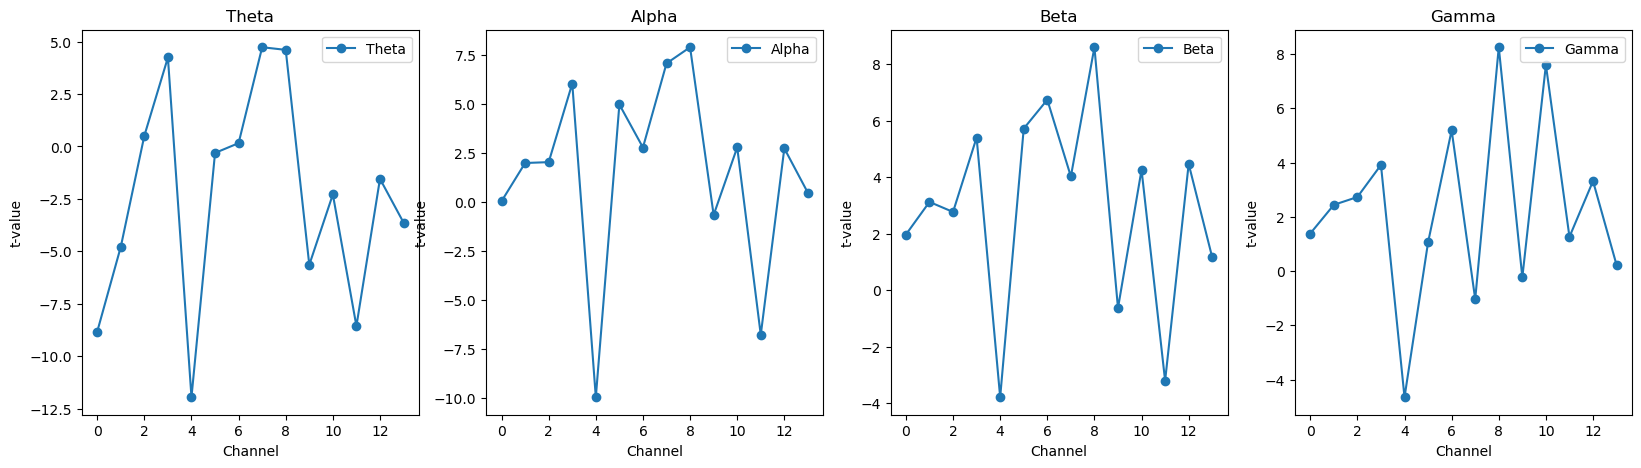

In [119]:
from scipy.stats import ttest_ind
from scipy import stats

n_channels = len(CHLS)
n_freq_bands = 4

t_values = np.zeros((n_channels, n_freq_bands))
p_values = np.zeros((n_channels, n_freq_bands))

for ch in range(n_channels):
    for i, band in enumerate(freq_bands):
        ind_data = random_epochs_ind.get_data()[:, ch, i]
        ood_data = random_epochs_ood.get_data()[:, ch, i]
        
        # Welch's t-test 수행
        t_value, p_value = ttest_ind(ind_data, ood_data, equal_var=False)
        t_values[ch, i] = t_value
        p_values[ch, i] = p_value

print(t_values.shape)

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, band in enumerate(freq_bands):
    axs[i].plot(p_values[:, i], marker='o', linestyle='-', label=f'{band}')
    axs[i].axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
    axs[i].set_title(f'{band}')
    axs[i].set_xlabel('Channel')
    axs[i].set_ylabel('p-value')
    axs[i].set_ylim([0, 0.1])
    axs[i].legend()
plt.show()

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, band in enumerate(freq_bands):
    axs[i].plot(t_values[:, i], marker='o', linestyle='-', label=f'{band}')
    axs[i].set_title(f'{band}')
    axs[i].set_xlabel('Channel')
    axs[i].set_ylabel('t-value')
    axs[i].legend()

plt.show()

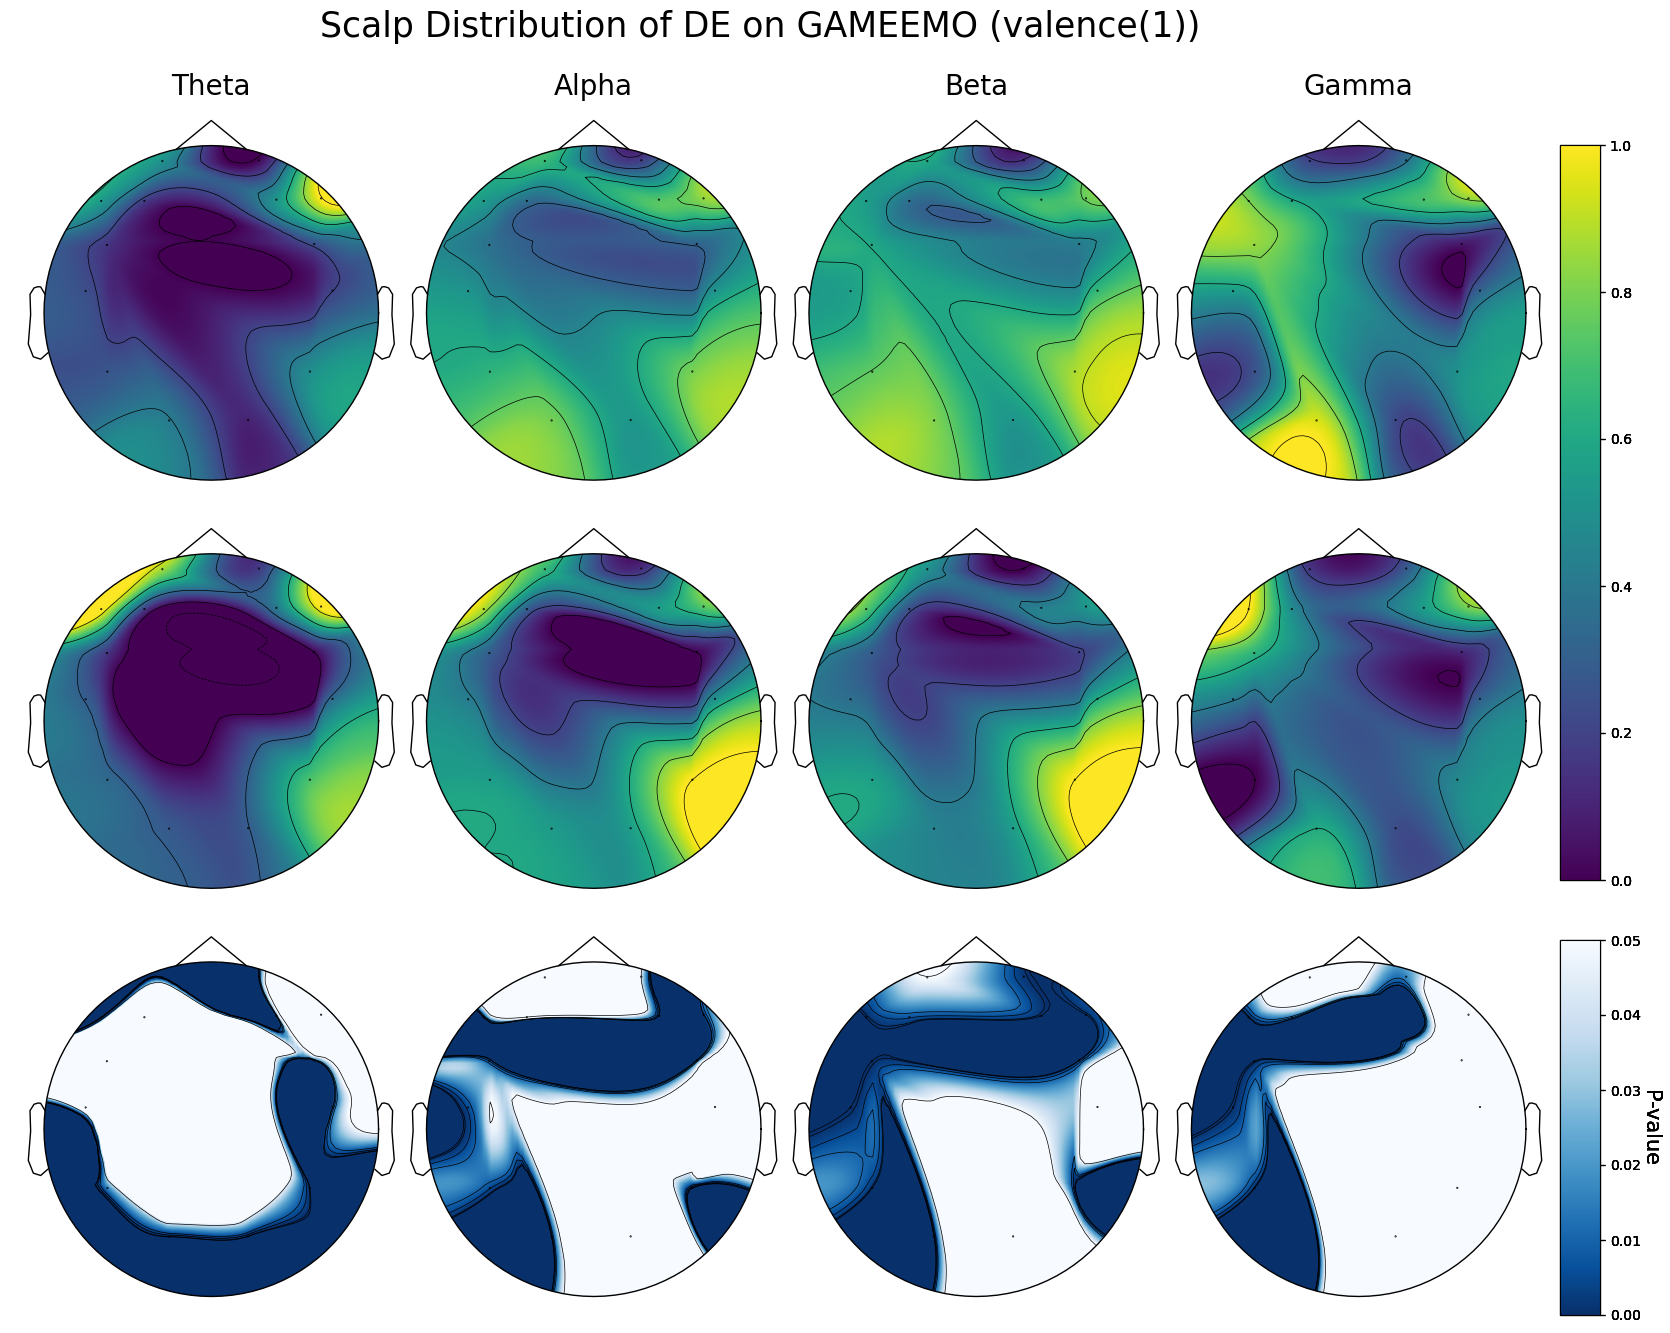

In [153]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle(f'Scalp Distribution of DE on {DATASET_NAME} ({label_name})', fontsize=25, y=0.99)

for col, (band, de) in enumerate(band_ind.items()):
    im, _ = mne.viz.plot_topomap(de, info, axes=axs[0, col], cmap='viridis', show=False, vlim=(0,1)) 
    axs[0, col].set_title(f"{band}", fontsize=20)
    
for col, (band, de) in enumerate(band_ood.items()):
    im, _ = mne.viz.plot_topomap(de, info, axes=axs[1, col], cmap='viridis', show=False, vlim=(0,1)) 
    # axs[1, col].set_title(f"{band}")
    
    cbar_ax = fig.add_axes([0.90, 0.41, 0.02, 0.49])
    plt.colorbar(im, cax=cbar_ax, format="%.1f")

for i, band in enumerate(freq_bands):
    im, _ = mne.viz.plot_topomap(p_values[:, i], info, axes=axs[2, i], cmap='Blues_r', vlim=(0, 0.05), contours=[0, 0.001, 0.005, 0.01, 0.05], show=False)
    # axs[2, i].set_title(f"", fontsize=20)

    cbar_ax = fig.add_axes([0.90, 0.12, 0.02, 0.25])
    cbar = plt.colorbar(im, cax=cbar_ax)
    cbar.set_label('P-value', rotation=270, labelpad=14, fontsize=15)

plt.subplots_adjust(wspace=-0.05, hspace=-0.08)
plt.savefig(join(analysis_path, f'{label_name}_t.png'), bbox_inches='tight', dpi=300)
plt.show()

## PSD 계산시

In [182]:
# def get_minmax(inds, oods):
#     combined = np.concatenate([inds, oods], axis=0)
#     return np.min(combined), np.max(combined)

# def get_indood(epochs_ind, epochs_ood):
    
#     freq_bands = {'Theta': [4, 8], 'Alpha': [8, 14], 'Beta': [14, 30], 'Gamma': [30, h_freq]}
    
#     ind_band = {band: [] for band in freq_bands.keys()}
#     ood_band = {band: [] for band in freq_bands.keys()}
    
#     for band, f_range in freq_bands.items():
#         print(band)
#         # Compute PSD
#         spectrum_ind = epochs_ind.compute_psd(fmin=f_range[0], fmax=f_range[1], verbose=False).get_data()
#         spectrum_ood = epochs_ood.compute_psd(fmin=f_range[0], fmax=f_range[1], verbose=False).get_data()
    
#         spectrum_ind = np.mean(spectrum_ind, axis=2)
#         spectrum_ood = np.mean(spectrum_ood, axis=2)
        
#         # Average per epoch
#         inds = np.mean(spectrum_ind, axis=0)
#         oods = np.mean(spectrum_ood, axis=0)
                                                             
#         # Normalize
#         min_val, max_val = get_minmax(inds, oods)
#         inds = (inds - min_val) / (max_val - min_val)
#         oods = (oods - min_val) / (max_val - min_val)
               
#         ind_band[band] = inds
#         ood_band[band] = oods
        
#     return ind_band, ood_band

# band_ind, band_ood = get_indood(random_epochs_ind, random_epochs_ood)

Theta
Alpha
Beta
Gamma


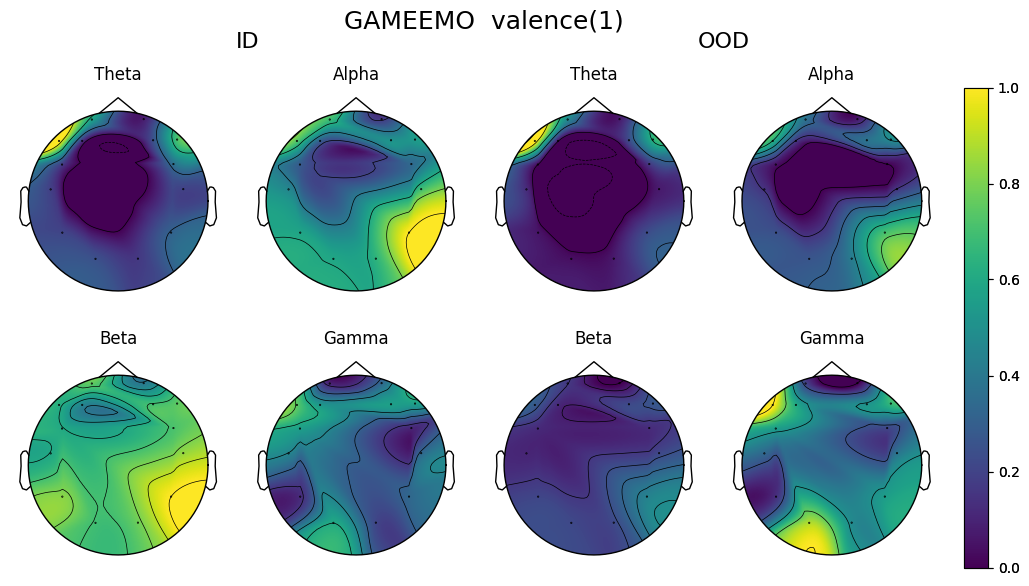

In [183]:
# def plot_psd_topomap(band_psd, label, fig, axs):
#     pos = [(0, 0), (0, 1), (1, 0), (1, 1)]
    
#     for p, (band, psd) in zip(pos, band_psd.items()):
#         im, _ = mne.viz.plot_topomap(psd, epochs_ind.info, axes=axs[p[0], p[1]], cmap='viridis', show=False, vlim=(0,1))
#         axs[p[0], p[1]].set_title(f"{band}")

#     cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.8])
#     plt.colorbar(im, cax=cbar_ax, format="%.1f")
#     plt.subplots_adjust(wspace=0.1, hspace=0.1)

# fig, axs = plt.subplots(2, 4, figsize=(12, 6))

# plot_psd_topomap(band_ind, 'ID', fig, axs[:, :2])
# axs[0, 0].text(1.1, 1.2, 'ID', fontsize=16, ha='center', transform=axs[0, 0].transAxes)

# plot_psd_topomap(band_ood, 'OOD', fig, axs[:, 2:])
# axs[0, 2].text(1.1, 1.2, 'OOD', fontsize=16, ha='center', transform=axs[0, 2].transAxes)

# plt.suptitle(f'{DATASET_NAME}  {label_name}', ha='center', fontsize=18, x=0.52, y=1.05)
# plt.savefig(join(analysis_path, f'{label_name}_analysis.png'), bbox_inches='tight', dpi=300)
# plt.show()

In [162]:
mne.__version__

'1.4.2'